In [6]:
import cv2
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import more_itertools as mit
import os
from im_processing_fct.functions import *

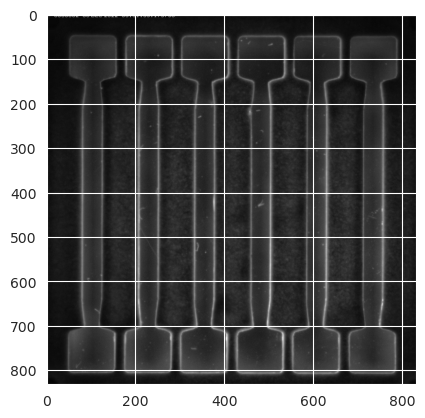

In [5]:
# Load images
ImagePath = pathlib.Path('/mnt/labserver/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/outer_arena_MultinazeBiS_Spacer/MultiMazeBiS_Empty/Spacer/221206/095129_s0a0_p6-0/Sample/img_0.jpg')
SampleTest = cv2.imread(ImagePath.as_posix())

plt.imshow(SampleTest)

In [12]:
cols = SampleTest.sum(axis=0)

SyntaxError: invalid syntax (415877440.py, line 2)

In [18]:
ImGr = cv2.cvtColor(SampleTest, cv2.COLOR_BGR2GRAY)  # convert to grayscale
# (height, width) = frame.shape[:2]
cols = ImGr.sum(axis=0)  # Compute sum of gray values of each image column
arenazones = np.where(cols > 55000)  # locate arenas from highest intensity columns
arenazones = arenazones[0].tolist()  # Reformat arenazones to list.

In [19]:
ArenaList = []  #Split the list in 6 arenas according to consecutive values
for zones in mit.consecutive_groups(arenazones):
    ArenaList.append(list(zones))

In [24]:
Edges = [min(ArenaList[n]) if ((n % 2) == 0) else max(ArenaList[n]) for n in range(len(ArenaList))]

In [40]:
Filled=[]

In [41]:

for i in range(0,len(Edges),2):
    Filled.append(list(range(Edges[i], Edges[i+1],1)))

In [35]:
Filled[0]

range(79, 126)

In [42]:

Cropped_Arenas = []

for n in range(len(Filled)):
    Cropped_Arenas.append(ExtList(Filled[n], 40))  #add margins to fully capture arenas


<BarContainer object of 832 artists>

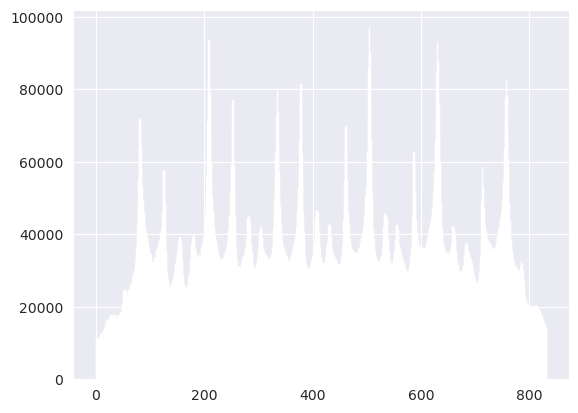

In [16]:
plt.bar(x=range(0,len(cols)), height=cols, color='blue')


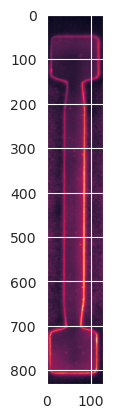

In [51]:
plt.imshow(ImGr[:,Cropped_Arenas[4]])

In [ ]:
Cropped_Arenas.remove(Cropped_Arenas[3])

In [ ]:

len(Cropped_Arenas[0])

In [59]:
ImagePath.with_suffix("")

PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/outer_arena_MultinazeBiS_Spacer/MultiMazeBiS_Empty/Spacer/221206/095129_s0a0_p6-0/Sample/img_0')

In [60]:
os.mkdir(ImagePath.with_suffix(""))

In [62]:
ImagePath.with_suffix("").as_posix()+'Arena'+str(1)+".jpg"

'/mnt/labserver/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/outer_arena_MultinazeBiS_Spacer/MultiMazeBiS_Empty/Spacer/221206/095129_s0a0_p6-0/Sample/img_0Arena1.jpg'

In [64]:
for i in range(len(Cropped_Arenas)) :
    cv2.imwrite(ImagePath.with_suffix("").as_posix()+'/Arena'+str(i+1)+".jpg", ImGr[:,Cropped_Arenas[i]])

In [67]:
ParentPath = pathlib.Path('/mnt/labserver/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/outer_arena_MultinazeBiS_Spacer/MultiMazeBiS_Empty/Spacer/221206/095129_s0a0_p6-0/Sample')

#ParentPath.glob("*.jpg")

In [70]:
for image in ParentPath.glob("*.jpg"):
    loaded = cv2.imread(image.as_posix())
    ImGr = cv2.cvtColor(loaded, cv2.COLOR_BGR2GRAY)  # convert to grayscale
    # (height, width) = frame.shape[:2]
    cols = ImGr.sum(axis=0)  # Compute sum of gray values of each image column
    arenazones = np.where(cols > 55000)  # locate arenas from highest intensity columns
    arenazones = arenazones[0].tolist()  # Reformat arenazones to list.
    ArenaList = []  #Split the list in 6 arenas according to consecutive values
    for zones in mit.consecutive_groups(arenazones):
        ArenaList.append(list(zones))
    Edges = [min(ArenaList[n]) if ((n % 2) == 0) else max(ArenaList[n]) for n in range(len(ArenaList))]
    Filled = []

    for i in range(0, len(Edges), 2):
        Filled.append(list(range(Edges[i], Edges[i + 1], 1)))
    Cropped_Arenas = []

    for n in range(len(Filled)):
        Cropped_Arenas.append(ExtList(Filled[n], 40))  #add margins to fully capture arenas
    os.mkdir(image.with_suffix(""))
    for i in range(len(Cropped_Arenas)) :
        cv2.imwrite(image.with_suffix("").as_posix()+'/Arena'+str(i+1)+".jpg", ImGr[:,Cropped_Arenas[i]])

In [ ]:
im_outer_arena_gray = []
im_outer_arena_path = im_bg_dir_path.joinpath("outer_arena")

In [ ]:

im_outer_arena_nb = 0
for img in im_outer_arena_path.rglob('img_0.jpg'):
    im = cv2.imread(img.as_posix())
    im_outer_arena_gray.append(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))
    im_outer_arena_nb += 1

f = plt.figure()
f.set_figheight(12)
f.set_figwidth(12)
for i in range(im_outer_arena_nb):
    plt.subplot(5, int(np.floor(im_outer_arena_nb / 5 + 1)), i + 1),
    plt.imshow(im_outer_arena_gray[i], cmap='gray', vmin=0, vmax=255)